In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Classification Problems 

### Binary Classification
(a yes or no. one thing or another)

### Multiclass classification
(when there's more than one class to classify with. basically 2 & above classes)
- imagenet has a really good classification database already

### Multilabel classification
(when there's more than one TAG in the same object. e.g. a french fry can be: golden, fastfood, fried etc.)



In [2]:
#Getting a random dataset from scikit learn

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise =0.03,
                    random_state=42)

In [3]:
#what does X, y look like? 
import pandas as pd

circles_df = pd.DataFrame({"X1" : X[:,0],
                           "X2":X[:,1],
                           "y": y})
circles_df.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


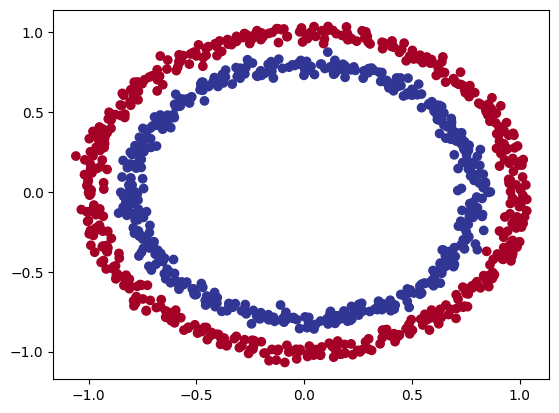

In [4]:
#What does X, y look like on a graph
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu) #this graph is kinda 3D, with color as the 3rd dimension. 

#note that the x-axis is X[0], and the y-axis of this graph is X[1] 

In [5]:
#turning our array data into tensors! (so pytorch can work with it)

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [18]:
#split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = 42) 

In [21]:
#Creating a model with linreg 

class circleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features (x1,x2), and upscale it to 5 features
        self.layer_2 = nn.Linear(in_features=5,out_features=1) #takes in the first layer (with 5 features), and outputs 1 feature

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #chain rule!

#Instantiate an instance of our model
model = circleModel()
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4079,  0.5893],
                      [ 0.1282,  0.2624],
                      [-0.2956,  0.3967],
                      [ 0.4537,  0.0295],
                      [ 0.0090, -0.3621]])),
             ('layer_1.bias',
              tensor([0.6993, 0.6717, 0.5444, 0.1700, 0.1222])),
             ('layer_2.weight',
              tensor([[ 0.0039, -0.2922,  0.0852, -0.2132, -0.0759]])),
             ('layer_2.bias', tensor([0.0269]))])

In [8]:
#a similar way to create layers is using `nn.Sequential()`

modelSequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), #first layer
    nn.Linear(in_features=5, out_features=1) #second layer
)

#the reason for this code is because, sometimes this format is easier to run/simpler to write
#than a referencing a subclass

In [9]:
#lets do some predictions with an untrained model

untrained_predictions = model(X_test)
untrained_predictions # remember, that this is y = f(x), and its naturally going to a single output.
#however, we want our predicitons to be 1 or a 0, not a float number! 

tensor([[ 0.0031],
        [-0.1565],
        [ 0.2828],
        [-0.0756],
        [ 0.0628],
        [-0.0329],
        [-0.3079],
        [-0.2795],
        [ 0.2916],
        [-0.1697],
        [ 0.0090],
        [-0.0481],
        [-0.3042],
        [ 0.2999],
        [ 0.3267],
        [-0.1652],
        [-0.2044],
        [ 0.0813],
        [ 0.0863],
        [ 0.1693],
        [-0.1609],
        [-0.2029],
        [ 0.1315],
        [ 0.1436],
        [-0.2854],
        [-0.2828],
        [ 0.2788],
        [-0.1045],
        [ 0.3478],
        [ 0.2644],
        [-0.2295],
        [-0.2831],
        [-0.0216],
        [ 0.1641],
        [ 0.0049],
        [-0.1522],
        [-0.0553],
        [ 0.3006],
        [ 0.2119],
        [ 0.2877],
        [ 0.1497],
        [ 0.2743],
        [-0.2010],
        [ 0.0861],
        [-0.0320],
        [-0.1716],
        [ 0.0238],
        [-0.1617],
        [-0.1226],
        [ 0.0061],
        [-0.0632],
        [-0.0423],
        [-0.

In [24]:
#create loss function and optimizers!
loss_fn = nn.BCEWithLogitsLoss() #we are using BCE now because we only have binary values!

#because of how our model operates, it is going to give us a logit, which is a probability. 
#this logit output is not normalized, i.e. it is not understandable in human language.
#by passing this logit in to an activation function, we are able to normalize this data, so that it's information
#the normalized data is the probability of the output. e.g. 0.99 indicates 99% sure it is a 'cat'.

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [13]:
#Calculating accuracy. Out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct/len(y_pred))*100
    return accuracy

In [ ]:
y_pred = model(X_test)
torch.eq(y_test, y_pred).sum().item() 
#torch.eq compares y_test and y_pred together. torch.eq is the same as writing (y_test == y_pred)
#.sum() calculates the sum of the entire tensor. since we are dealing with 1 and 0,
# the sum will give us the number of true values
#.item() returns the sum number as a singular number

tensor(0)

In [14]:
#logits output
model(X_test)
#as you can see from the output, the numbers are not 1 & 0, which is required.
#hence, use the sigmoid activation function for our logits!
#why sigmoid? because it works with binary classification problem the best!
#remember, the activation function NORMALIZES our data, so that it is understandable


tensor([[ 0.0031],
        [-0.1565],
        [ 0.2828],
        [-0.0756],
        [ 0.0628],
        [-0.0329],
        [-0.3079],
        [-0.2795],
        [ 0.2916],
        [-0.1697],
        [ 0.0090],
        [-0.0481],
        [-0.3042],
        [ 0.2999],
        [ 0.3267],
        [-0.1652],
        [-0.2044],
        [ 0.0813],
        [ 0.0863],
        [ 0.1693],
        [-0.1609],
        [-0.2029],
        [ 0.1315],
        [ 0.1436],
        [-0.2854],
        [-0.2828],
        [ 0.2788],
        [-0.1045],
        [ 0.3478],
        [ 0.2644],
        [-0.2295],
        [-0.2831],
        [-0.0216],
        [ 0.1641],
        [ 0.0049],
        [-0.1522],
        [-0.0553],
        [ 0.3006],
        [ 0.2119],
        [ 0.2877],
        [ 0.1497],
        [ 0.2743],
        [-0.2010],
        [ 0.0861],
        [-0.0320],
        [-0.1716],
        [ 0.0238],
        [-0.1617],
        [-0.1226],
        [ 0.0061],
        [-0.0632],
        [-0.0423],
        [-0.

In [15]:
y_pred_probs = torch.sigmoid(model(X_train))
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
      

In [64]:
#Training our data
epochs = 1000

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train).squeeze() #squeezing to remove one dimension for sigmoid function.
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, #remember to pass in the logits, because our loss function requires it
                   y_train) 
    
    #we can calculate the accuracy
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    #Optimizer
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test).squeeze() #squeezing to remove one dimension
        test_y_pred = torch.round(torch.sigmoid(test_logits))


        #note that we dont actually have to include this. but this is a nice way to view whats going on
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test, test_y_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}\n Loss: {loss:.5f} \n Accuracy: {acc:.5f}% \n Test Loss: {test_loss:.2f} \n Test accuracy: {test_acc:.2f}% \n")



Epoch: 0
 Loss: 0.69286 
 Accuracy: 58.28571% 
 Test Loss: 0.69 
 Test accuracy: 53.67% 

Epoch: 100
 Loss: 0.69285 
 Accuracy: 58.71429% 
 Test Loss: 0.69 
 Test accuracy: 53.67% 

Epoch: 200
 Loss: 0.69285 
 Accuracy: 58.85714% 
 Test Loss: 0.69 
 Test accuracy: 54.67% 

Epoch: 300
 Loss: 0.69285 
 Accuracy: 59.00000% 
 Test Loss: 0.69 
 Test accuracy: 54.67% 

Epoch: 400
 Loss: 0.69285 
 Accuracy: 59.28571% 
 Test Loss: 0.69 
 Test accuracy: 55.33% 

Epoch: 500
 Loss: 0.69284 
 Accuracy: 59.28571% 
 Test Loss: 0.69 
 Test accuracy: 55.33% 

Epoch: 600
 Loss: 0.69284 
 Accuracy: 59.14286% 
 Test Loss: 0.69 
 Test accuracy: 55.67% 

Epoch: 700
 Loss: 0.69284 
 Accuracy: 59.28571% 
 Test Loss: 0.69 
 Test accuracy: 56.00% 

Epoch: 800
 Loss: 0.69284 
 Accuracy: 59.14286% 
 Test Loss: 0.69 
 Test accuracy: 56.33% 

Epoch: 900
 Loss: 0.69283 
 Accuracy: 59.42857% 
 Test Loss: 0.69 
 Test accuracy: 56.67% 



We note that the above scores are producing very subpar results. 

Why is that? 

Sometimes, it is hard to see a clear relationship within the data, and it might take even more learning for the model to be trained accuurately. 

## How to improve a model? 

- Add more layers - gives the mmodel more chances to learn about patterns in the data.
- Add more hidden units - go from 5 neuros to 10?
- Fit for longer - use more epochs!
- Change the activation functions - am I using the right activation function? Should I use softmax instead?
- Change the loss function - BCE or L1Loss?

In [59]:
import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
    print('file exists')
else: 
    print('downloading file')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py', "wb") as f:
        f.write(request.content)
from helper_functions import plot_decision_boundary

file exists


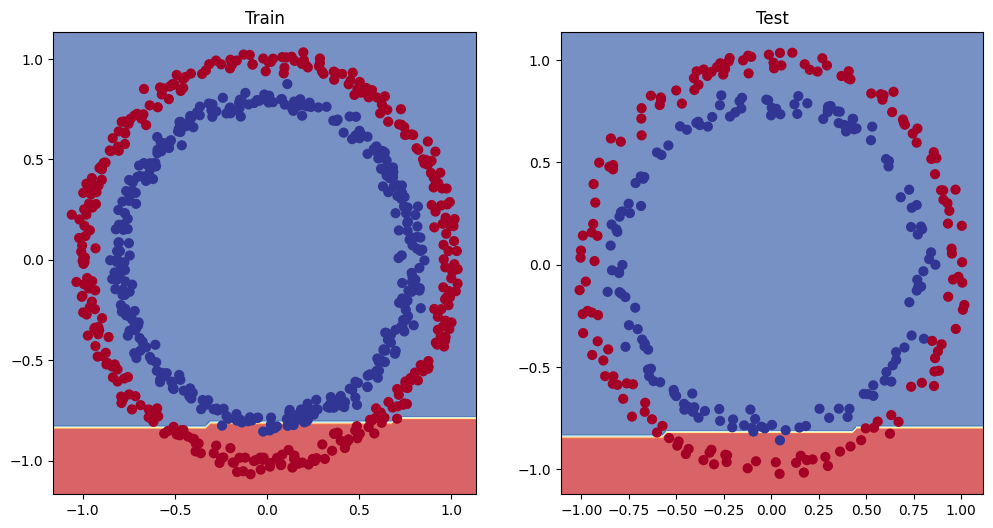

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

#the line determines the accuracy of the model. it is currently not very accurate
#we need to improve our model!

Alright, so we now know how to improve our model. What's next? 

We only change **1 hyperparameter** first, so that we know if this change is causing an improvement or a degradation. 



In [66]:
#adding more units/neurons

class newCircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = newCircleModel()


In [67]:
#Training our data
epochs = 1000

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze() #squeezing to remove one dimension for sigmoid function.
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, #remember to pass in the logits, because our loss function requires it
                   y_train) 
    
    #we can calculate the accuracy
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    #Optimizer
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze() #squeezing to remove one dimension
        test_y_pred = torch.round(torch.sigmoid(test_logits))


        #note that we dont actually have to include this. but this is a nice way to view whats going on
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test, test_y_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}\n Loss: {loss:.5f} \n Accuracy: {acc:.5f}% \n Test Loss: {test_loss:.2f} \n Test accuracy: {test_acc:.2f}% \n")



Epoch: 0
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 100
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 200
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 300
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 400
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 500
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 600
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 700
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 800
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

Epoch: 900
 Loss: 0.74317 
 Accuracy: 49.14286% 
 Test Loss: 0.73 
 Test accuracy: 52.00% 

